## SVM with Scikit-Learn

In [8]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

### Load the modified Iris dataset

In [9]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1. ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [3]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### SVM with RBF Using Scikit-Learn

In [4]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()

In [5]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# An example of using draw_heatmap().
#    errors = np.random.random((len(C_list), len(gamma_list)))
#    draw_heatmap(errors, gamma_list, C_list)

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

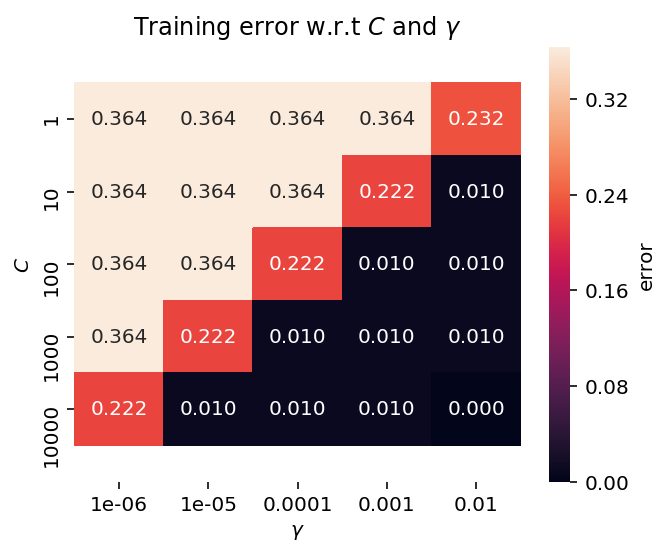

In [6]:
draw_heatmap(training_errors, gamma_list, C_list)

In [7]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C*={}, best parameter gamma*={}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C*=10000, best parameter gamma*=0.01
Test error: 0.09999999999999998
